In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator
# local imports
import DataAndPlotting as my
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\PHSX616\\Lab3 - Torsional Oscillator\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\PHSX616\\Lab3 - Torsional Oscillator\\Data\\'

# Data

In [2]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Resonance'   : path_data + 'Resonance.csv', 
} # t==trial

tables: dict[str, dict[str, np.array]] = my.UnpackAllTables(filenames)

Resonance columns:	 ['Freqency [mHz]', 'Max pk-pk [V]', 'Max Amplitude [V]']


# Plots

In [30]:
def PlotXmanyY(
    x: np.array, # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '-',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    vlines: list = None, 
    hlines: list = None, 
    logScale: bool = False,
    fileName: str = ''  # filename to save the figure as
) : 
    """Plotting function for x and y data arrays."""
    # formatting 
    my.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid()
    if(logScale) : ax.set_yscale('log')
    # plot lines 
    if(vlines != None) : 
        for v in vlines : 
            plt.axvline(v, c='maroon', linestyle=':')
    if(hlines != None) : 
        for h in hlines : 
            plt.axhline(h, c='maroon', linestyle=':')
    # data
    for yi,yl,ci in zip(y,yleg,c) : 
        # plt.plot(x,yi,c=ci,linestyle=linestyle,label=yl) 
        plt.errorbar(x, yi, yerr=yerr, xerr=xerr, elinewidth=0.8, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    if(len(y) > 1) : plt.legend()
    # finish 
    if(fileName != '') : my.Save(fileName)
    plt.show()

## Resonance

Resonance:  862.0 48.0


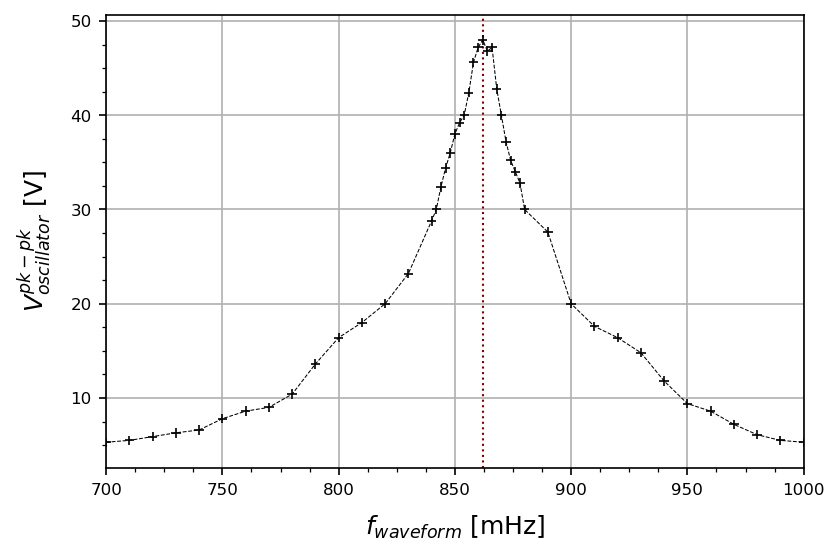

In [36]:
yRes = max(tables['Resonance']['Max pk-pk [V]'])
xRes = tables['Resonance']['Freqency [mHz]'] [ np.where(tables['Resonance']['Max pk-pk [V]'] == yRes) [0][0] ]
print('Resonance: ', xRes, yRes)

PlotXmanyY(
    x = tables['Resonance']['Freqency [mHz]'],
    y  = [tables['Resonance']['Max pk-pk [V]']],
    yleg = [None],  
    c =['k'],
    xerr = 2,    # error on x axis
    yerr = 0.5,    # error on y axis
    xlim = (700,1000),
    xlab = '$f_{waveform}$ [mHz]', # label on x axis 
    ylab = '$V_{oscillator}^{pk-pk}$ [V]', # label on y axis
    vlines=[xRes],
    linestyle = '--',   # style of xy curve line
    fileName = path_fig+'resonance_VvsF.png'  # filename to save the figure as
) 